In [2]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

sns.set(style="darkgrid", palette='husl')

def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
%cd Z:\Dropbox\iPython Notebooks\Machine Learning\fastai\data\house-prices-advanced-regression-techniques
#%ls

Z:\Dropbox\iPython Notebooks\Machine Learning\fastai\data\house-prices-advanced-regression-techniques


# Data Pre-Processing

In [6]:
df_train_raw = pd.read_csv('train.csv', low_memory=False)
df_test_raw = pd.read_csv('test.csv', low_memory=False)

In [7]:
len(df_train_raw)

1460

In [50]:
df_train_raw.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,12.072541
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,12.254863
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,12.493130
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,11.864462
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,11.901583


In [49]:
df_train_raw.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,12.024051
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,0.399452
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,10.460242
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,11.775097
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,12.001505
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,12.273731


In [10]:
# Since the model is scored by Root-Mean-Squared-Error (RMSE) of the Log:

df_train_raw.SalePrice = np.log(df_train_raw.SalePrice)

In [11]:
df_train_raw.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [12]:
df_train_raw.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247694
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109011
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317167
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849398
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429216


Convert categorical variables into numerical

In [13]:
train_cats(df_train_raw)
train_cats(df_test_raw)

We can specify the order to use for categorical variables if we wish:

In [14]:
df_train_raw.SaleCondition.cat.categories
df_test_raw.SaleCondition.cat.categories

Index(['Abnorml', 'AdjLand', 'Alloca', 'Family', 'Normal', 'Partial'], dtype='object')

In [15]:
# Fraction of missing data for each feature

display_all(df_train_raw.isnull().sum().sort_index()/len(df_train_raw))

1stFlrSF         0.000000
2ndFlrSF         0.000000
3SsnPorch        0.000000
Alley            0.937671
BedroomAbvGr     0.000000
BldgType         0.000000
BsmtCond         0.025342
BsmtExposure     0.026027
BsmtFinSF1       0.000000
BsmtFinSF2       0.000000
BsmtFinType1     0.025342
BsmtFinType2     0.026027
BsmtFullBath     0.000000
BsmtHalfBath     0.000000
BsmtQual         0.025342
BsmtUnfSF        0.000000
CentralAir       0.000000
Condition1       0.000000
Condition2       0.000000
Electrical       0.000685
EnclosedPorch    0.000000
ExterCond        0.000000
ExterQual        0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
Fence            0.807534
FireplaceQu      0.472603
Fireplaces       0.000000
Foundation       0.000000
FullBath         0.000000
Functional       0.000000
GarageArea       0.000000
GarageCars       0.000000
GarageCond       0.055479
GarageFinish     0.055479
GarageQual       0.055479
GarageType       0.055479
GarageYrBlt      0.055479
GrLivArea   

In [16]:
os.makedirs('tmp', exist_ok=True)
df_train_raw.to_feather('tmp/train_raw')
df_test_raw.to_feather('tmp/test_raw')

### Pre-processing

In [17]:
df_train_raw = pd.read_feather('tmp/train_raw')
df_test_raw = pd.read_feather('tmp/test_raw')

We'll replace categories with their numeric codes, handle missing continuous values, and split the dependent variable into a separate variable.

In [18]:
df_train, y, nas = proc_df(df_train_raw, 'SalePrice')
df_test, y_test, nas_test = proc_df(df_test_raw)

In [19]:
df_train.drop('Id', axis=1, inplace=True)
#df_test.drop('Id', inplace=True)

In [20]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
0,60,4,65.0,8450,2,0,4,4,1,5,...,0,0,0,2,2008,9,5,False,False,False
1,20,4,80.0,9600,2,0,4,4,1,3,...,0,0,0,5,2007,9,5,False,False,False
2,60,4,68.0,11250,2,0,1,4,1,5,...,0,0,0,9,2008,9,5,False,False,False
3,70,4,60.0,9550,2,0,1,4,1,1,...,0,0,0,2,2006,9,1,False,False,False
4,60,4,84.0,14260,2,0,1,4,1,3,...,0,0,0,12,2008,9,5,False,False,False


# Random Forest Model

### Run a preliminary Random Forest model on the data before we look at feature importance and construct other models

In [21]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(df_train, y)
m.score(df_train,y)

0.9822201301156303

### Split data into Training and Validation sets

In [22]:
def split_vals(a,n):
    return a[:n].copy(), a[n:].copy()

n_valid = int(0.2 * len(df_train)) # Percentage of data to use for Validation set
n_trn = len(df_train)-n_valid
raw_train, raw_valid = split_vals(df_train_raw, n_trn)
X_train, X_valid = split_vals(df_train, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape

((1168, 82), (1168,), (292, 82))

In [23]:
def rmse(x,y):
    return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [24]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

Wall time: 238 ms
[0.05261284739321767, 0.14756663331681188, 0.9828122976947896, 0.8576381502548047]


In [25]:
m = RandomForestRegressor(n_estimators=2000, min_samples_leaf=1, max_features=0.3, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.050588626296972694, 0.13778565969572037, 0.9841094114236574, 0.875884699285488, 0.8816136883419174]


Kaggle submission score of 0.143, good enough for top 57%.

# Feature Importance

In [26]:
fi = rf_feat_importance(m, df_train); fi[:10]

,cols,imp
16,OverallQual,0.219195
45,GrLivArea,0.149082
18,YearBuilt,0.089128
37,TotalBsmtSF,0.046680
26,ExterQual,0.046388
60,GarageCars,0.046085
61,GarageArea,0.041986
42,1stFlrSF,0.038039
48,FullBath,0.033717
58,GarageYrBlt,0.027092


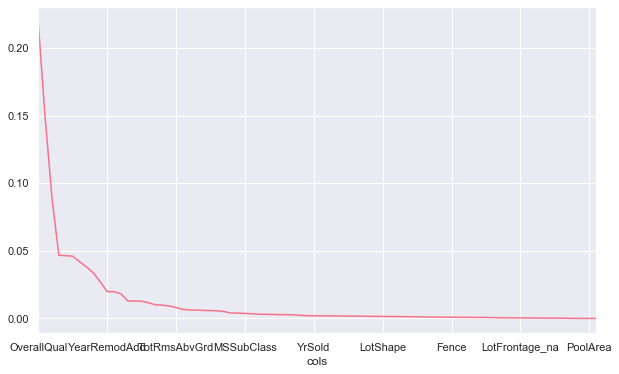

In [27]:
fi.plot('cols', 'imp', figsize=(10,6), legend=False);

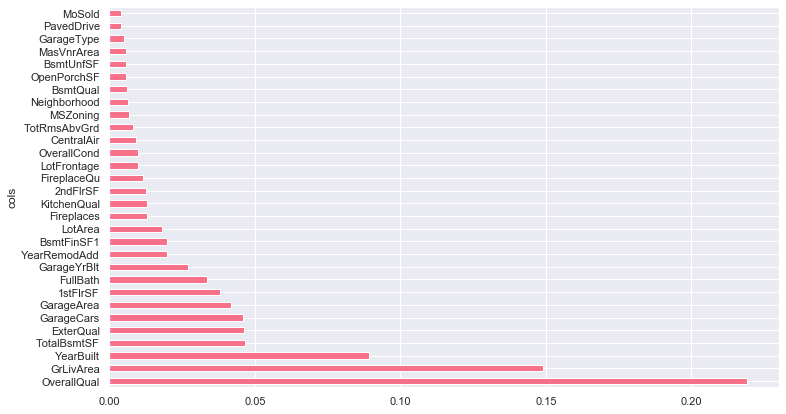

In [28]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

plot_fi(fi[:30]);

In [29]:
to_keep = fi[fi.imp>0.0015].cols; len(to_keep)

50

In [30]:
df_keep = df_train[to_keep].copy()
X_train, X_valid = split_vals(df_keep, n_trn)

In [41]:
m = RandomForestRegressor(n_estimators=2000, max_features=0.3, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.05065140432024589, 0.13707060651151992, 0.9840699480586089, 0.8771695754465404, 0.8813258491731681]


# Construct other models

In [44]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

linreg = sklearn.linear_model.LinearRegression()
lasso = sklearn.linear_model.Lasso(alpha = 0.0005, random_state=1) 
enet =  sklearn.linear_model.ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3)
krr = sklearn.kernel_ridge.KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
krr2 = sklearn.linear_model.Ridge(alpha=0.6)
gboost = sklearn.ensemble.GradientBoostingRegressor(n_estimators=2000)
rforest = RandomForestRegressor(n_estimators=2000, max_features=0.3, n_jobs=-1, oob_score=True)

print('linreg:')
linreg.fit(X_train, y_train)
print_score(linreg)

print('lasso:')
lasso.fit(X_train, y_train)
print_score(lasso)

print('enet:')
enet.fit(X_train, y_train)
print_score(enet)

print('krr2:')
krr2.fit(X_train, y_train)
print_score(krr2)

print('gboost:')
gboost.fit(X_train, y_train)
print_score(gboost)

print('rforest:')
rforest.fit(X_train, y_train)
print_score(rforest)

linreg:
[0.12719571673762936, 0.20620982627109682, 0.8995432360229677, 0.72200563244239]
lasso:
[0.12730776319936438, 0.2076191625508374, 0.8993661737308237, 0.7181927551772267]
enet:
[0.12728817167139864, 0.2074485575722626, 0.8993971446420795, 0.7186556986275767]
krr2:
[0.12719591055056098, 0.20625787639372017, 0.8995429298831815, 0.7218760632558597]
gboost:


C:\ProgramData\Miniconda3\envs\fastai\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.020085947544668414, tolerance: 0.018810859187734494
  positive)


[0.0038660819468228, 0.1305154479044684, 0.9999071939431292, 0.8886369491095834]
rforest:
[0.05083885206007511, 0.13791902326095445, 0.9839518238890934, 0.8756443191232548, 0.880792410181507]


In [45]:
def rmsle_cv(model):
    kf = KFold(n_splits = 10, shuffle = True, random_state = 10).get_n_splits(X_train.values)
    rmse = np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring='neg_mean_squared_error', cv=kf))
    return rmse

In [46]:
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error


gboost = sklearn.ensemble.GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state=5)


gboost.fit(X_train, y_train)
print_score(gboost)

[0.04959706292026834, 0.13364774502111235, 0.9847262341666789, 0.883227506220894]


In [47]:
score = rmsle_cv(gboost)
print("\nScore: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Score: 0.1261 (0.0204)



#### Kaggle submission score of 0.12741, which is currently in the top 35%.